# Data Visualization with Plotly Demo

## Introduction to Jupyter Notebook
Jupyter Notebooks are a staple in any data scientist's toolkit. It is a free, open source, interactive data science environment that can function as both an IDE and a visualisation tool. A Jupyter Notebook is a single document where you can run code, display the output and add equations and explainations. Each notebook is a `.ipynb` file, which is a text file that describes the content of the notebook in JSON format.

Each Jupter Notebook contains a kernal that can be thought of as a "computational engine" that executes the code within the notebook. Notebooks are made up of a number of cells. For example, this piece of text you are reading resides in the first cell of this notebook. They can be markdown cells that display text in-place or code cells. When a code cell is run, the output is displayed below the cell. The order in which cells are run matters! Cells containing functions or variables have to be run before those same functions or variables can be called from a subsequent cell. 

How to use a Jupyter Notebook:
- To run a cell, either click the arrow to the left of the cell or press `ctrl + Enter` after selecting the cell. When a cell is run, a number will appear in square brackets (e.g. [1]) telling you the order in which each cell is run.
- To interrupt a cell while it is running, press the button with the black square in the toolbar at the top
- To restart the kernal, right-click `kernel` and choose from the list of restart options available


## Introduction to Plotly

Pandas is an open source library providing data structure and data analysis tools for the Python language. Plotly is another open source that allows you to put together high quality graphs to faciliate the visualisation of the data. Plotly Dash (written on top of Plotly.js and React.js) allows one to quickly build data apps that are rendered in the browser. 

This notebook contains examples of how each of these libraries can be leveraged to analyse and visualise data. For more information, please check out the official documentation listed below.

#### Further Documentation
https://pandas.pydata.org/docs/ \
https://plot.ly/python/ \
https://dash.plotly.com/introduction 

## Setting Up

You can install the libraries using pip or conda. 

**N.B.** you may have to restart the kernel after installing these packages for your first run.

In [ ]:
#!/bin/env python

# install packages
!pip3 install --user pandas
!pip3 install --user numpy
!pip3 install --user matplotlib
!pip3 install --user plotly
!pip3 install --user jupyter-dash

^C
Traceback (most recent call last):
  File "/opt/conda/bin/pip3", line 6, in <module>
    from pip._internal.cli.main import main
  File "/opt/conda/lib/python3.7/site-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/opt/conda/lib/python3.7/site-packages/pip/_internal/cli/autocompletion.py", line 12, in <module>
    from pip._internal.metadata import get_default_environment
  File "/opt/conda/lib/python3.7/site-packages/pip/_internal/metadata/__init__.py", line 3, in <module>
    from .base import BaseDistribution, BaseEnvironment, FilesystemWheel, MemoryWheel, Wheel
  File "/opt/conda/lib/python3.7/site-packages/pip/_internal/metadata/base.py", line 21, in <module>
    from pip._vendor.packaging.requirements import Requirement
  File "/opt/conda/lib/python3.7/site-packages/pip/_vendor/packaging/requirements.py", line 10, in <module>
    from pip._vendor.pyparsing import (  # noqa
  File "/opt/conda/lib/py

Having installed the libraries, you can import them as follows.

In [17]:
# import libraries
%matplotlib inline

#import plotly
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output, State

# Set display row/column to show all data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [18]:
#!pip3 install --user plotly
#import plotly


## Access Data From Endpoint

#### Further Documentation
https://docs.python-requests.org/en/master/

**N.B.** the url used in this example is from the demo project we have set up. Please replace it with your own url.

In [40]:
# define endpoint url
url = "https://dbgee-mar22-12.ew.r.appspot.com/api/text"

# use requests library to send HTTP requests
# in this example, GET sentiment analysis data
data = json.loads(requests.get(url).text)

# examine data
data

{'5631671361601536': {'text': 'it is sunny and bright outside and it will be colder overnight',
  'timestamp': '2022-03-23 10:47:54.162574+00:00',
  'sentiment': 'positive'},
 '5632499082330112': {'text': 'it is sunny and birght',
  'timestamp': '2022-03-23 10:46:37.100192+00:00',
  'sentiment': 'neutral'},
 '5634161670881280': {'text': 'sell horrible trees for money',
  'timestamp': '2022-03-22 19:18:03.117197+00:00',
  'sentiment': 'negative'},
 '5635008819625984': {'text': 'Sell trees',
  'timestamp': '2022-03-23 19:04:12.857337+00:00',
  'sentiment': 'neutral'},
 '5636645067948032': {'text': 'it is sunny and bright outside and it will be cold overnight',
  'timestamp': '2022-03-23 10:47:23.058599+00:00',
  'sentiment': 'positive'},
 '5638358357245952': {'text': 'it is sunny and raining outside and it will be colder overnight',
  'timestamp': '2022-03-23 10:48:02.497649+00:00',
  'sentiment': 'negative'},
 '5642368648740864': {'text': 'it is sunny and bright',
  'timestamp': '2022-0

## Data Visualisation

Plotly is a commonly-used data visualisation library. The following examples will show you how to create different graphs from the sample data.

We can first read the sample data into a dataframe. The sample data is taken from the UK Met Office and shows the maximum and minimum temperature, the rainfall and the number of hours of sunlight for each month in 2018.

In [48]:
from google.cloud import language_v1

def sample_analyze_entities(text_content):
    """
    Analyzing Entities in a String

    Args:
      text_content The text content to analyze
    """

    client = language_v1.LanguageServiceClient()

    # text_content = 'California is a state.'

    # Available types: PLAIN_TEXT, HTML
    type_ = language_v1.Document.Type.PLAIN_TEXT

    # Optional. If not specified, the language is automatically detected.
    # For list of supported languages:
    # https://cloud.google.com/natural-language/docs/languages
    language = "en"
    document = {"content": text_content, "type_": type_, "language": language}

    # Available values: NONE, UTF8, UTF16, UTF32
    encoding_type = language_v1.EncodingType.UTF8

    response = client.analyze_entities(request = {'document': document, 'encoding_type': encoding_type})
    
    # TODO add in the filter file here
    filterEsgWords = open('articles/'+ file, "r")
    
    # Loop through entitites returned from the API
    for entity in response.entities:
        print(u"Representative name for the entity: {}".format(entity.name))

        # Get entity type, e.g. PERSON, LOCATION, ADDRESS, NUMBER, et al
        print(u"Entity type: {}".format(language_v1.Entity.Type(entity.type_).name))

        # Get the salience score associated with the entity in the [0, 1.0] range
        print(u"Salience score: {}".format(entity.salience))

        # Loop over the metadata associated with entity. For many known entities,
        # the metadata is a Wikipedia URL (wikipedia_url) and Knowledge Graph MID (mid).
        # Some entity types may have additional metadata, e.g. ADDRESS entities
        # may have metadata for the address street_name, postal_code, et al.
        for metadata_name, metadata_value in entity.metadata.items():
            print(u"{}: {}".format(metadata_name, metadata_value))

        # Loop over the mentions of this entity in the input document.
        # The API currently supports proper noun mentions.
        for mention in entity.mentions:
            print(u"Mention text: {}".format(mention.text.content))

            # Get the mention type, e.g. PROPER for proper noun
            print(
                u"Mention type: {}".format(language_v1.EntityMention.Type(mention.type_).name)
            )

    # Get the language of the text, which will be the same as
    # the language specified in the request or, if not specified,
    # the automatically-detected language.
    print(u"Language of the text: {}".format(response.language))



In [30]:
import os

In [50]:
# read sample csv data into dataframe
arcText = ''

for file in os.listdir('articles'):
    if not file.startswith('.'): 
        print(file)
        #got our articles
        article = open('articles/'+ file, "r")
        arcText = article.read()
        article.close()
        #print(arcText)
        sample_analyze_entities(arcText)
        #call POST on our endpoint
        #result = json.loads(requests.post(url).text)
        
    

article2.txt
Representative name for the entity: Deutsche Bank
Entity type: ORGANIZATION
Salience score: 0.2161695808172226
wikipedia_url: https://en.wikipedia.org/wiki/Deutsche_Bank
mid: /m/02lc8s
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: DB
M

In [47]:
print(arcText)
response = os.exec('curl -X 'POST' \
  'https://dbgee-mar22-12.ew.r.appspot.com/api/text' \
  -H 'accept: application/json' \
  -H 'Content-Type: application/x-www-form-urlencoded' \
  -d 'text=buy%20flowers%20for%20the%20weekend%20cos%20it'\''s%20mother'\''s%20day'')
    
        

Deutsche Bank Partners with Oracle to Accelerate Technology Modernization
Deutsche Bank selects Oracle Exadata Cloud@Customer to consolidate key databases in its selected data centers

Companies form innovation partnership to modernize Deutsche Bank’s mission-critical databases and enable new financial products and services

Frankfurt, Germany and Austin, Texas—June 24, 2021
Deutsche Bank partnership
Oracle and Deutsche Bank, one of the world’s largest financial services organizations, today announced a multi-year collaboration to modernize the bank’s database technology and accelerate its digital transformation.

The agreement will see Deutsche Bank upgrade its existing database systems and migrate the bulk of its Oracle Database estate to Oracle Exadata Cloud@Customer, an on-premises deployment option of the Oracle Exadata Cloud Service, to support applications that either will not move to the public cloud or may in the future. This will provide a dedicated platform to support and sc

To gain more insight into a particular column, you can use the *describe()* method on the dataframe column name.

Representative name for the entity: Deutsche Bank Partners
Entity type: ORGANIZATION
Salience score: 0.39449429512023926
wikipedia_url: https://en.wikipedia.org/wiki/Deutsche_Bank
mid: /m/02lc8s
Mention text: Deutsche Bank Partners
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Mention text: Deutsche Bank
Mention type: PROPER
Representative name for the entity: Oracle
Entity type: ORGANIZATION
Salience score: 0.10727179050445557
wikipedia_url: https://en.wikipedia.org/wiki/Oracle_Co

In [22]:
# describe the monthly rainfall
rain_data = weather.Rain.describe()
print(rain_data)

count    12.000000
mean     48.333333
std      24.630555
min       0.400000
25%      29.300000
50%      58.200000
75%      62.050000
max      81.200000
Name: Rain, dtype: float64


#### 1D Line Graph

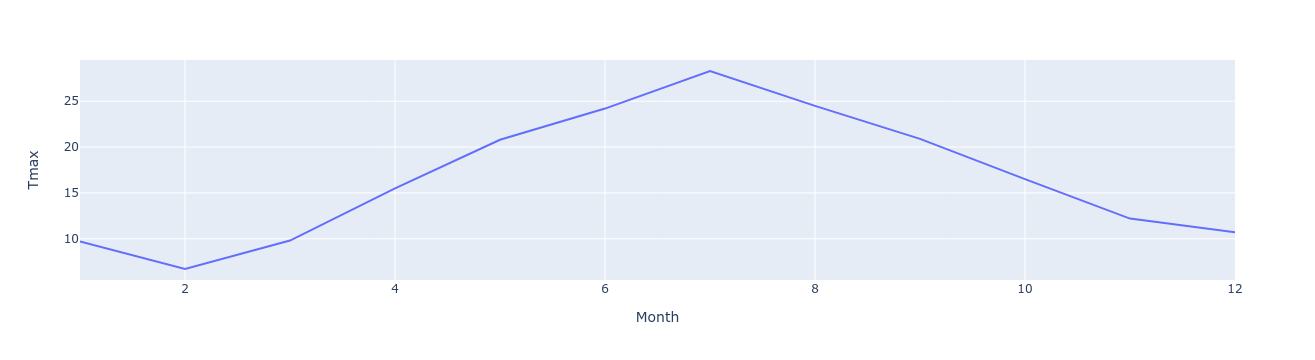

<AxesSubplot:xlabel='Month'>

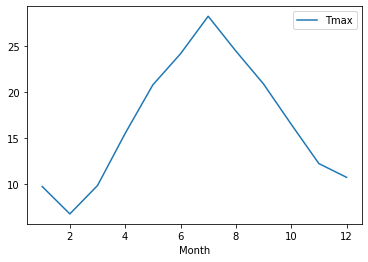

In [23]:
# plot max temp. vs month

max_temp_fig = px.line(weather, x='Month', y='Tmax')
max_temp_fig.show()


# you can compare this to the following line of code, which uses the more standard matplotlib library to plot the same data

weather.plot.line(y='Tmax', x='Month')

We can plot multiple lines on the same graph and edit the layout to make it look more sophisticated. We can also update the dataframe with the average temperature and show that on the graph too.

In [28]:
# calculate ave. temp. and create a new column in the dataframe 
weather['Tmed'] = (weather['Tmax'] + weather['Tmin'])/2

# inspect the first 5 rows
weather.head()

,Year,Month,Tmax,Tmin,Rain,Sun,Tmed
0,2018,1,9.7,3.8,58.0,46.5,6.75
1,2018,2,6.7,0.6,29.0,92.0,3.65
2,2018,3,9.8,3.0,81.2,70.3,6.40
3,2018,4,15.5,7.9,65.2,113.4,11.70
4,2018,5,20.8,9.8,58.4,248.3,15.30


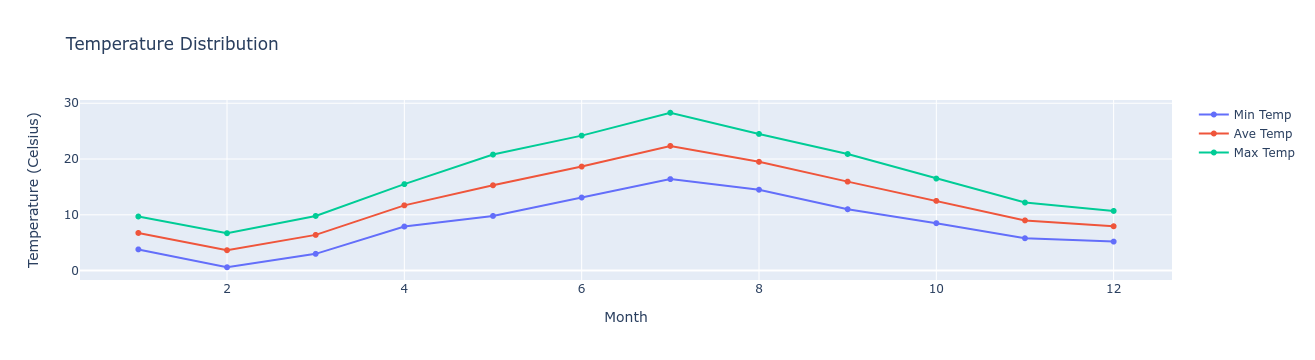

In [29]:
# plot max and min temp. vs month
min_temp = go.Scatter(x=weather['Month'], y=weather['Tmin'], name='Min Temp')
med_temp = go.Scatter(x=weather['Month'], y=weather['Tmed'], name='Ave Temp')
max_temp = go.Scatter(x=weather['Month'], y=weather['Tmax'], name='Max Temp')

min_max_temp_fig = go.Figure()

min_max_temp_fig.add_trace(min_temp)
min_max_temp_fig.add_trace(med_temp)
min_max_temp_fig.add_trace(max_temp)

# edit the layout
min_max_temp_fig.update_layout(title="Temperature Distribution",
                               xaxis_title='Month',
                               yaxis_title='Temperature (Celsius)')

min_max_temp_fig.show()


#### Bar Chart

In [ ]:
# lot rainfall vs month

rainfall_fig = px.bar(weather, x='Month', y='Rain')
rainfall_fig.update_layout(title="Rainfall Distribution",
                           xaxis_title="Month",
                           yaxis_title='Rain')
rainfall_fig.show()

# The following line of code achieves the same thing using Matplotlib

# weather.plot.bar(y='Rain', x='Month')

#### Histogram

Histograms are useful for when you want to visualise the frequency distribution of the data.

In [ ]:
rainfall_hist = px.histogram(weather, x='Rain', nbins=10) # you can specify the number of bins
rainfall_hist.update_layout(title="Frequency of Rainfall Amount",
                            bargap=0.1) # you can specify a gap between bars
rainfall_hist.show()

#### Multiple Charts

You can also create separate charts for each column of data. The following example shows separate line graphs of the four columns.

In [ ]:
# multiple line charts 
rain = go.Scatter(x=weather['Month'], y=weather['Rain'], name="Rain")
sun = go.Scatter(x=weather['Month'], y=weather['Sun'], name="Sun")

subplots_fig = make_subplots(rows=2, cols=2,
                             subplot_titles=("Min Temp", "Max Temp", "Rain", "Sun"))

# use min_temp and max_temp plots from before
subplots_fig.add_trace(min_temp, row=1, col=1)
subplots_fig.add_trace(max_temp, row=2, col=1)
subplots_fig.add_trace(rain, row=1, col=2)
subplots_fig.add_trace(sun, row=2, col=2)

subplots_fig.update_layout(height=600, width=800, title_text="Subplots Demo")

subplots_fig.show()


## Introducing Jupyter Dash

Dash is Plotly's open source Python framework for building full stack analytic web applications using pure Python. The JupyterDash library makes these features available from the jupyter notebook.

In [ ]:
### Run ngrok to tunnel Dash app port 8050 to the outside world. 
### This command runs in the background.
get_ipython().system_raw('./ngrok http 8050 &')

In [ ]:
# get ID of the most recent 
last_text_id = list(data.keys())[0]

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    
    
    # THESE LINES DISPLAY THE OUTPUT OF NLP API
    html.P("Most Recent Text ID: {}".format(last_text_id)),
    html.P("Text Analysed: {}".format(data[last_text_id]["text"])),
    html.P("Sentiment: {}".format(data[last_text_id]["sentiment"])),
  
    # THESE LINES DEMO ONE OF THE DASH CORE COMPONENT(dcc) i.e. dcc.Input
    html.H3("Change the value in the text box to see callbacks in action!"),
    html.Div([
        "Input: ",
        dcc.Input(id='my-input', value='initial value', type='text')
    ]),
    html.Br(),
    html.Div(id='my-output'),
    
    # THESE LINES DEMO THE INTEGRATION OF PLOTLY GRAPHS WITH DASH
    dcc.Graph(figure=subplots_fig),

])


@app.callback(
    Output(component_id='my-output', component_property='children'),
    Input(component_id='my-input', component_property='value')
)
def update_output_div(input_value):
    return 'Output: {}'.format(input_value)


In [ ]:
app.run_server(mode="external", port=8050)

#### In case the below cell has errors, please rerun it

In [ ]:
### Get the public URL where you can access the Dash app. Copy this URL.
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"